In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
# Noticed that some cells contain the symbol "?". Set them as NA values
Adultdata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    na_values=[' ?'], header=None)

# Drop rows with NA values
Adultdata = Adultdata.dropna()

In [3]:
# Add corresponding column names to the dataset

ColumnNames = ['age','workclass','fnlwgt','education','education-num','marital-status', 
               'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
               'native-country']

# Also need a name for the wage information
ColumnNames.append('wage')
Adultdata.columns = ColumnNames

# View the first few rows of the updated data
Adultdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Visualization 1-2

In [9]:
# Visualization 1
# Explore correlations among continuous variables

import plotly
import plotly.graph_objs as go
import plotly.plotly as py
plotly.tools.set_credentials_file(username='pccavs', api_key='CIdalbRPV40NEYEB0lkh')

Plotdata = go.Splom(dimensions=[dict(label='age',
                                 values=Adultdata['age']),
                            dict(label='capital-gain',
                                 values=Adultdata['capital-gain']),
                            dict(label='capital-loss',
                                 values=Adultdata['capital-loss']),
                            dict(label='education-num',
                                 values=Adultdata['education-num']),
                            dict(label='fnlwgt',
                                 values=Adultdata['fnlwgt']),
                            dict(label='hours-per-week',
                                 values=Adultdata['hours-per-week'])])

axis = dict(showline=True,
          zeroline=False,
          gridcolor='#fff',
          ticklen=6)

layout = go.Layout(
    title='Correlation among continuous variables',
    dragmode='select',
    width=700,
    height=700,
    autosize=False,
    hovermode='closest',
    xaxis1=dict(axis),xaxis2=dict(axis),xaxis3=dict(axis),xaxis4=dict(axis),xaxis5=dict(axis),xaxis6=dict(axis),
    yaxis1=dict(axis),yaxis2=dict(axis),yaxis3=dict(axis),yaxis4=dict(axis),yaxis5=dict(axis),yaxis6=dict(axis) )  


fig1 = dict(data=[Plotdata], layout=layout)
py.iplot(fig1, filename = 'Scatter plot matrix')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pccavs/0 or inside your plot.ly account where it is named 'Scatter plot matrix'


My Visualization 1 applies the Plotly library to draw a scatter plot matrix for showing correlation among continuous variables. I chose the scatter plot matrix as visual encoding since it is built on simple scatter plot but attempts to represent relationships among multiple variables at same time, easily understood by viewers and effective as well (mentioned in slide "visual encodings" pg.24). Because of the overlay part in above plot, my visualization also enables viewers to check corresponding (x,y) coordinates when mouse hovering on a point, which is convenient to low-level task such as Query->Identify (mentioned in slide "tasks" pg.21).

According to the Visualization 1, we can clearly learn the correlation among continuous variables. And if we want to build a ML prediction model, such as predicting hours-per-week based on other variables, it's definitely helpful to remove variables like education-num and age since the above plot shows they are hardly correlated with the predicted variable. So the scatter plot matrix could be guidance for variable selection when building a ML prediction model. 

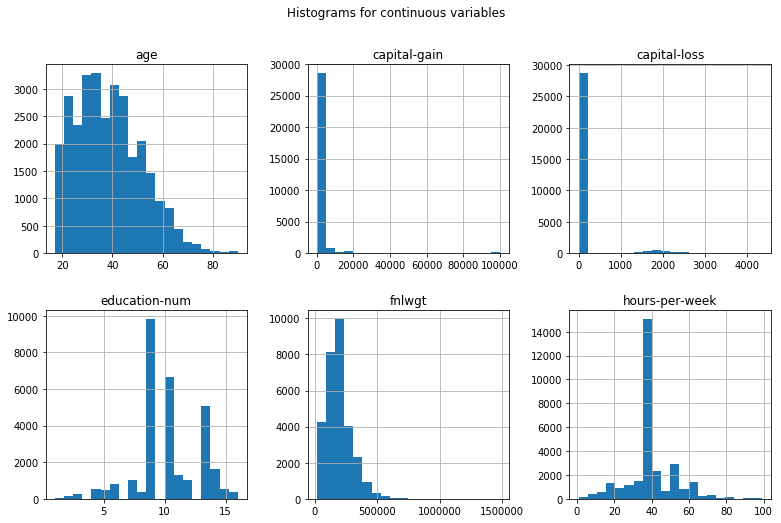

In [5]:
# Visualization 2
# View distributions of continuous variables

fig, axes = plt.subplots(2, 3, figsize=[13, 8])
fig.suptitle('Histograms for continuous variables')
Plots = Adultdata.hist(bins=20, ax=axes)

My Visualization 2 applies the default "hist" command of Pandas library to draw 6 histograms for showing distributions of continuous variables. I chose the histogram as visual encoding since it is widely accepted and straightforward for visualizing the distribution of continuous variable. As we learnt in class, the mark is Lines and the channel is Position (slide "Marks & Channels" pg.13). Also the visualization is facted in order to present multiple variables at same time, and viewers can easily examine all distributions without visual interference.

According to the Visualization 2, we can clearly learn the distributions of continuous variables. And if we want to build a ML classification model or do cluster analysis, we may assign higher weights to variables age, education-num, fnlwgt and hours-per-week since they have more meaningful distributions, and lower weights to variables capital-gain, capital-loss that with less meaningful distributions.

# Split the dataset randomly into train/test (80/20)

In [4]:
# Create a function to split the dataset randomly into train(80)/test(20)
# General idea is: 1.randomly shuffle the rows of dataset 2.Then select the first 80% cases as train set, the 
# remaining 20% cases as test set

def splitData(df):
    indexList = np.arange(df.shape[0]) # Get a list for index of rows
    np.random.shuffle(indexList) # Shuffle the index for random selection
    datalength = len(indexList)
    traindata_Length = math.floor((datalength*8)/10)
    trainData = df.iloc[indexList[:traindata_Length]] # Extract train data from dataframe
    testData = df.iloc[indexList[traindata_Length:]] # Extract test data from the dataframe
    return trainData, testData

trainData, testData = splitData(Adultdata)

# Preprocess the data

In [5]:
# Change categorical features into dummies using one-hot encoding, but keep the wage column as original 
# (need to exclude from one-hot encoding).
# And when I read the description of variables, I noticed that variable "fnlwgt"(final weight) only applies within
# state. So I decide to drop it at the beginning, which will be convenient for the normalization in next step and help
# produce better KNN results as well.

updatedData = Adultdata.drop(['fnlwgt','wage'], axis=1)
updatedData = pd.get_dummies(updatedData)
updatedData['wage'] = Adultdata['wage'] # Add wage column back to the updated dataframe

In [6]:
# Apply standardization for continuous features, on train set and test set individually.

# First we want to find all columns that represent for continuous variables
continuousCol = [col for col, datatype in Adultdata.dtypes.items() if col != 'fnlwgt' 
                and datatype != 'O']

# Randomly split data into train and test set, using the function created in previous part.
trainData, testData = splitData(updatedData)

# Create a function to seperate the wage column
def seperateWage(df):
    return df.drop('wage',axis=1), df['wage']

trainData_input, trainData_wage = seperateWage(trainData)
testData_input, testData_wage = seperateWage(testData)

# Standardization step for train and test set
from sklearn.preprocessing import StandardScaler
datascaler = StandardScaler().fit(trainData_input[continuousCol]) # use only information of train data
trainData_input[continuousCol] = datascaler.transform(trainData_input[continuousCol])
testData_input[continuousCol] = datascaler.transform(testData_input[continuousCol])

# Grid Search and Build Optimal KNN-Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Since we are going to use a grid search over K and p then based on 10 fold CV on the training set 
# to select the optimal hyperparameters, I chose the cv accuracy score as evaluation metric 
# for this classification task.

# Grid search step:
optimal_model = None
optimal_score = -float('inf')
performance = []

# Only use uniform weights
for k in range(1,11):
    for p in [1, 2]:
        knnModel = KNeighborsClassifier(n_neighbors = k, p = p)
        scores = cross_val_score(knnModel, trainData_input, trainData_wage, cv = 10, scoring = 'accuracy')
        for score in scores:
            if score > optimal_score:
                optimal_score = score
                optimal_model = knnModel
            
            performance.append({
                         'k': k,
                         'p': p,
                         'score': score
                     })

optimal_model, optimal_score  # View the optimal model and optimal score

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=9, p=1,
            weights='uniform'), 0.8500414250207126)

Based on the above result, we can find that the optimal k is equal to 9 and optimal p is equal to 1.

# Visualization 3

In [68]:
# Change the performance into a data frame
performance = pd.DataFrame(performance)

# Only keep the performance records with p = 2
updated_perform = performance.loc[performance['p'] == 2]

# And we can drop the column 'p' right now since all p values are equal to 2.
updated_perform = updated_perform.drop('p', axis=1)

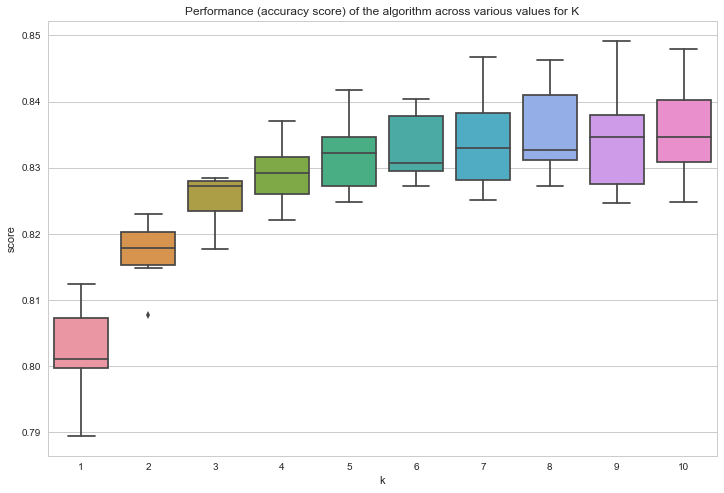

In [69]:
# Draw a parallel boxplot (based on values of k) to view performance of the algorithm across various values for K. 

import seaborn as sns
sns.set(style = "whitegrid")
plt.figure(figsize=(12, 8))
plt.title("Performance (accuracy score) of the algorithm across various values for K")
Plot = sns.boxplot(x = "k", y = "score", data = updated_perform)

My Visualization 3 applies the boxplot command of seaborn library to draw a parallel boxplot for presenting performance of the algorithm across various values for K. In this part, we are doing 10-fold cv for each value of K, and we actually have 100 score values in total (10 values for each of the 10 values of K). Then a parallel boxplot becomes an appropriate choice for the visual encoding. It can show not only general performance for each K value, but also specific distribution of performance scores with respect to each K value. And the parallel boxplot contributes to high-level task (Consume->Discover, slide "tasks" pg.21) as well. For example, we can easily discover that there is a general increase trend for performance scores as K value becomes larger.    

# Run on test set

In [25]:
# According to the previous part, we have found that the optimal k is equal to 9 and optimal p is equal to 1.
# And in this part, I decide to use the mean accuracy score built in KNeighborsClassifier as evaluation metric 
# for this classification task.

knnModel_optimal = KNeighborsClassifier(n_neighbors = 9, p = 1)
knnModel_optimal.fit(trainData_input, trainData_wage)

predictedWage = knnModel_optimal.predict(testData_input)
print(predictedWage)
print("The mean accuracy score for the optimal KNN model on test set is", 
      knnModel_optimal.score(testData_input, testData_wage))

[' <=50K' ' >50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
The mean accuracy score for the optimal KNN model on test set is 0.836399801093983
